In [18]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [19]:
#instalando pacotes
!pip install pyspark
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [20]:
#iniciando sessão
spark = SparkSession.builder.appName("DadosEnem2020").getOrCreate()

In [21]:

#lendo o dataset
df_pyspark = spark.read.csv('G:\Meu Drive\Teste\microdados_enem_2020\DADOS\MICRODADOS_ENEM_2020.csv',header = True,sep = ';',inferSchema = True)
df_pyspark.show()

+------------+------+---------------+-------+---------------+-----------+----------------+---------------+---------------+---------+---------+------------+----------------+-------------------+---------+---------+----------------------+------------------+---------------+------------------+--------------------+-----------+-----------+--------------+--------------+--------------+--------------+-----------+-----------+-----------+-----------+----------+----------+----------+----------+--------------------+--------------------+--------------------+--------------------+---------+--------------------+--------------------+--------------------+--------------------+-----------------+-------------+-------------+-------------+-------------+-------------+---------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|NU_INSCRICAO|NU_ANO|TP_FAIXA_ETARIA|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|TP_ST_CONCLUSAO|

In [22]:

#dimensão do dataset
print((df_pyspark.count(), len(df_pyspark.columns)))

(5783109, 76)


In [23]:
df_pyspark.columns

['NU_INSCRICAO',
 'NU_ANO',
 'TP_FAIXA_ETARIA',
 'TP_SEXO',
 'TP_ESTADO_CIVIL',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'CO_MUNICIPIO_ESC',
 'NO_MUNICIPIO_ESC',
 'CO_UF_ESC',
 'SG_UF_ESC',
 'TP_DEPENDENCIA_ADM_ESC',
 'TP_LOCALIZACAO_ESC',
 'TP_SIT_FUNC_ESC',
 'CO_MUNICIPIO_PROVA',
 'NO_MUNICIPIO_PROVA',
 'CO_UF_PROVA',
 'SG_UF_PROVA',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'TP_PRESENCA_MT',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TX_RESPOSTAS_CN',
 'TX_RESPOSTAS_CH',
 'TX_RESPOSTAS_LC',
 'TX_RESPOSTAS_MT',
 'TP_LINGUA',
 'TX_GABARITO_CN',
 'TX_GABARITO_CH',
 'TX_GABARITO_LC',
 'TX_GABARITO_MT',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q003',
 'Q004',
 'Q005',
 'Q006',
 'Q007',
 'Q008',
 'Q009

In [24]:
df_pyspark.dtypes

[('NU_INSCRICAO', 'bigint'),
 ('NU_ANO', 'int'),
 ('TP_FAIXA_ETARIA', 'int'),
 ('TP_SEXO', 'string'),
 ('TP_ESTADO_CIVIL', 'int'),
 ('TP_COR_RACA', 'int'),
 ('TP_NACIONALIDADE', 'int'),
 ('TP_ST_CONCLUSAO', 'int'),
 ('TP_ANO_CONCLUIU', 'int'),
 ('TP_ESCOLA', 'int'),
 ('TP_ENSINO', 'int'),
 ('IN_TREINEIRO', 'int'),
 ('CO_MUNICIPIO_ESC', 'int'),
 ('NO_MUNICIPIO_ESC', 'string'),
 ('CO_UF_ESC', 'int'),
 ('SG_UF_ESC', 'string'),
 ('TP_DEPENDENCIA_ADM_ESC', 'int'),
 ('TP_LOCALIZACAO_ESC', 'int'),
 ('TP_SIT_FUNC_ESC', 'int'),
 ('CO_MUNICIPIO_PROVA', 'int'),
 ('NO_MUNICIPIO_PROVA', 'string'),
 ('CO_UF_PROVA', 'int'),
 ('SG_UF_PROVA', 'string'),
 ('TP_PRESENCA_CN', 'int'),
 ('TP_PRESENCA_CH', 'int'),
 ('TP_PRESENCA_LC', 'int'),
 ('TP_PRESENCA_MT', 'int'),
 ('CO_PROVA_CN', 'int'),
 ('CO_PROVA_CH', 'int'),
 ('CO_PROVA_LC', 'int'),
 ('CO_PROVA_MT', 'int'),
 ('NU_NOTA_CN', 'double'),
 ('NU_NOTA_CH', 'double'),
 ('NU_NOTA_LC', 'double'),
 ('NU_NOTA_MT', 'double'),
 ('TX_RESPOSTAS_CN', 'string'),
 ('

In [25]:
#valores nulos para cada coluna
from pyspark.sql.functions import when, count, col
df_pyspark.select([count(when(col(c).isNull(), c)).alias(c) for c in df_pyspark.columns]).show(vertical=True)

-RECORD 0-------------------------
 NU_INSCRICAO           | 0       
 NU_ANO                 | 0       
 TP_FAIXA_ETARIA        | 0       
 TP_SEXO                | 0       
 TP_ESTADO_CIVIL        | 0       
 TP_COR_RACA            | 0       
 TP_NACIONALIDADE       | 0       
 TP_ST_CONCLUSAO        | 0       
 TP_ANO_CONCLUIU        | 0       
 TP_ESCOLA              | 0       
 TP_ENSINO              | 4479663 
 IN_TREINEIRO           | 0       
 CO_MUNICIPIO_ESC       | 4878540 
 NO_MUNICIPIO_ESC       | 4878540 
 CO_UF_ESC              | 4878540 
 SG_UF_ESC              | 4878540 
 TP_DEPENDENCIA_ADM_ESC | 4878540 
 TP_LOCALIZACAO_ESC     | 4878540 
 TP_SIT_FUNC_ESC        | 4878540 
 CO_MUNICIPIO_PROVA     | 0       
 NO_MUNICIPIO_PROVA     | 0       
 CO_UF_PROVA            | 0       
 SG_UF_PROVA            | 0       
 TP_PRESENCA_CN         | 0       
 TP_PRESENCA_CH         | 0       
 TP_PRESENCA_LC         | 0       
 TP_PRESENCA_MT         | 0       
 CO_PROVA_CN        

In [26]:
# as colunas 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC' e 'SG_UF_ESC' (dados da escola em que o inscrito estudou) 
# terão seus Null values preenchidos com os valores relativos ao local de aplicação da prova ('CO_MUNICIPIO_PROVA',...) 
from pyspark.sql.functions import coalesce
df1 = df_pyspark.withColumn('CO_MUNICIPIO_ESC', coalesce('CO_MUNICIPIO_ESC','CO_MUNICIPIO_PROVA'))
df2 = df1.withColumn('NO_MUNICIPIO_ESC', coalesce('NO_MUNICIPIO_ESC','NO_MUNICIPIO_PROVA'))
df3 = df2.withColumn('CO_UF_ESC', coalesce('CO_UF_ESC','CO_UF_PROVA'))
df_final = df3.withColumn('SG_UF_ESC', coalesce('SG_UF_ESC','SG_UF_PROVA'))

In [27]:
df_final.select([count(when(col(c).isNull(), c)).alias(c) for c in df_final.columns]).show(vertical=True)

-RECORD 0-------------------------
 NU_INSCRICAO           | 0       
 NU_ANO                 | 0       
 TP_FAIXA_ETARIA        | 0       
 TP_SEXO                | 0       
 TP_ESTADO_CIVIL        | 0       
 TP_COR_RACA            | 0       
 TP_NACIONALIDADE       | 0       
 TP_ST_CONCLUSAO        | 0       
 TP_ANO_CONCLUIU        | 0       
 TP_ESCOLA              | 0       
 TP_ENSINO              | 4479663 
 IN_TREINEIRO           | 0       
 CO_MUNICIPIO_ESC       | 0       
 NO_MUNICIPIO_ESC       | 0       
 CO_UF_ESC              | 0       
 SG_UF_ESC              | 0       
 TP_DEPENDENCIA_ADM_ESC | 4878540 
 TP_LOCALIZACAO_ESC     | 4878540 
 TP_SIT_FUNC_ESC        | 4878540 
 CO_MUNICIPIO_PROVA     | 0       
 NO_MUNICIPIO_PROVA     | 0       
 CO_UF_PROVA            | 0       
 SG_UF_PROVA            | 0       
 TP_PRESENCA_CN         | 0       
 TP_PRESENCA_CH         | 0       
 TP_PRESENCA_LC         | 0       
 TP_PRESENCA_MT         | 0       
 CO_PROVA_CN        

In [28]:
#divisão das variáveis

#colunas relacionadas as escolas
lista_escolas = ['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC','CO_UF_ESC','SG_UF_ESC','TP_DEPENDENCIA_ADM_ESC']

#colunas relacionadas as notas dos inscritos
lista_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

#colunas relacionadas aos dados cadastrais do inscrito
lista_dados_cadastrais = ['NU_INSCRICAO','TP_FAIXA_ETARIA','TP_SEXO','TP_ESTADO_CIVIL','TP_COR_RACA','TP_NACIONALIDADE','TP_ST_CONCLUSAO','TP_ANO_CONCLUIU','TP_ESCOLA','TP_ENSINO','IN_TREINEIRO']
     

In [29]:
df_dados_escola = df_final.select(lista_escolas)
df_dados_notas = df_final.select(lista_notas)
df_dados_cadastrais = df_final.select(lista_dados_cadastrais)

In [30]:
#lista do número de escolas em cada Munícipio
df_dados_escola_group=df_dados_escola.groupBy("NO_MUNICIPIO_ESC").agg(count("NO_MUNICIPIO_ESC"))
df_dados_escola_group.withColumnRenamed("count(NO_MUNICIPIO_ESC)","Número de Escolas que os inscritos fizeram ensino médio no Município").sort("Número de Escolas que os inscritos fizeram ensino médio no Município",ascending = False).show()
     

+----------------+--------------------------------------------------------------------+
|NO_MUNICIPIO_ESC|Número de Escolas que os inscritos fizeram ensino médio no Município|
+----------------+--------------------------------------------------------------------+
|       S�o Paulo|                                                              251437|
|  Rio de Janeiro|                                                              156726|
|        Bras�lia|                                                              117096|
|          Manaus|                                                              114008|
|       Fortaleza|                                                              108679|
|        Salvador|                                                              100206|
|  Belo Horizonte|                                                               98800|
|           Bel�m|                                                               94794|
|        S�o Lu�s|              

In [31]:

df_dados_escola = df_dados_escola.withColumn('Dependência Administrativa',when(col('TP_DEPENDENCIA_ADM_ESC')== 1, 'Federal')
                     .when(col('TP_DEPENDENCIA_ADM_ESC')==2, 'Estadual')
                     .when(col('TP_DEPENDENCIA_ADM_ESC')==3, 'Municipal')
                     .when(col('TP_DEPENDENCIA_ADM_ESC')==4, 'Privada')
                     .otherwise('Desconhecida'))
df_dados_escola = df_dados_escola.drop('TP_DEPENDENCIA_ADM_ESC')
df_dados_escola.show()

+----------------+--------------------+---------+---------+--------------------------+
|CO_MUNICIPIO_ESC|    NO_MUNICIPIO_ESC|CO_UF_ESC|SG_UF_ESC|Dependência Administrativa|
+----------------+--------------------+---------+---------+--------------------------+
|         1501402|               Bel�m|       15|       PA|              Desconhecida|
|         2408102|               Natal|       24|       RN|              Desconhecida|
|         2927408|            Salvador|       29|       BA|                  Estadual|
|         3547304| Santana de Parna�ba|       35|       SP|                 Municipal|
|         3121605|          Diamantina|       31|       MG|              Desconhecida|
|         4305207|         Cerro Largo|       43|       RS|              Desconhecida|
|         2611606|              Recife|       26|       PE|              Desconhecida|
|         3550308|           S�o Paulo|       35|       SP|              Desconhecida|
|         2507507|         Jo�o Pessoa|    

In [32]:
import pyspark.sql.functions as F
df_dados_escola.groupby('Dependência Administrativa').count().withColumnRenamed('count','Contagem').withColumn('Porcentagem',F.round((F.col('Contagem') / df_dados_escola.count()) * 100,2 )).sort('Porcentagem',ascending=False).show()
     

+--------------------------+--------+-----------+
|Dependência Administrativa|Contagem|Porcentagem|
+--------------------------+--------+-----------+
|              Desconhecida| 4878540|      84.36|
|                  Estadual|  630939|      10.91|
|                   Privada|  218705|       3.78|
|                   Federal|   46594|       0.81|
|                 Municipal|    8331|       0.14|
+--------------------------+--------+-----------+



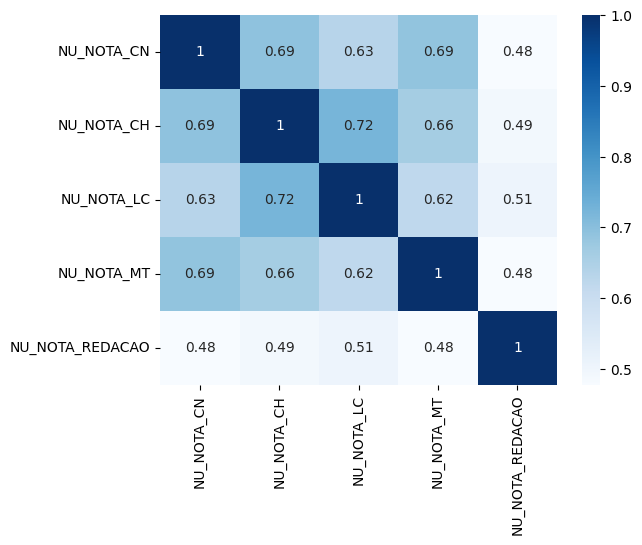

In [33]:
# Correlação entre as notas das provas do Enem
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
#excluindo alunos com notas zero
df_dados_notas = df_dados_notas.dropna(how='any')
# converter para vetor coluna 
vector_col = "corr_variaveis"
assembler = VectorAssembler(inputCols=df_dados_notas.columns, outputCol=vector_col)
df_vector = assembler.transform(df_dados_notas).select(vector_col)
# matriz correlação - mapa de calor
matrix= Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
fig= plt.subplots()
sns.heatmap(corrmatrix, annot=True, cmap = 'Blues',xticklabels=df_dados_notas.columns,yticklabels=df_dados_notas.columns);
     

In [34]:
df_dados_cadastrais.show()

+------------+---------------+-------+---------------+-----------+----------------+---------------+---------------+---------+---------+------------+
|NU_INSCRICAO|TP_FAIXA_ETARIA|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|IN_TREINEIRO|
+------------+---------------+-------+---------------+-----------+----------------+---------------+---------------+---------+---------+------------+
|200006271946|             11|      F|              1|          2|               1|              1|             11|        1|     NULL|           0|
|200001195856|             11|      M|              2|          3|               1|              1|             11|        1|     NULL|           0|
|200001943954|              4|      F|              2|          3|               2|              2|              0|        2|        1|           0|
|200001908998|              2|      M|              1|          3|               1|              2|       

In [35]:
df_dados_cadastrais.select([count(when(col(c).isNull(), c)).alias(c) for c in df_dados_cadastrais.columns]).show(vertical=True)
     

-RECORD 0-------------------
 NU_INSCRICAO     | 0       
 TP_FAIXA_ETARIA  | 0       
 TP_SEXO          | 0       
 TP_ESTADO_CIVIL  | 0       
 TP_COR_RACA      | 0       
 TP_NACIONALIDADE | 0       
 TP_ST_CONCLUSAO  | 0       
 TP_ANO_CONCLUIU  | 0       
 TP_ESCOLA        | 0       
 TP_ENSINO        | 4479663 
 IN_TREINEIRO     | 0       



In [36]:
#preenchendo valores nulos da coluna 'TP_ENSINO' com o valor 0 (desconhecido)
df_dados_cadastrais = df_dados_cadastrais.na.fill(value=0,subset = ['TP_ENSINO'])
df_dados_cadastrais.show()

+------------+---------------+-------+---------------+-----------+----------------+---------------+---------------+---------+---------+------------+
|NU_INSCRICAO|TP_FAIXA_ETARIA|TP_SEXO|TP_ESTADO_CIVIL|TP_COR_RACA|TP_NACIONALIDADE|TP_ST_CONCLUSAO|TP_ANO_CONCLUIU|TP_ESCOLA|TP_ENSINO|IN_TREINEIRO|
+------------+---------------+-------+---------------+-----------+----------------+---------------+---------------+---------+---------+------------+
|200006271946|             11|      F|              1|          2|               1|              1|             11|        1|        0|           0|
|200001195856|             11|      M|              2|          3|               1|              1|             11|        1|        0|           0|
|200001943954|              4|      F|              2|          3|               2|              2|              0|        2|        1|           0|
|200001908998|              2|      M|              1|          3|               1|              2|       

In [37]:
#tratando as colunas

#estado civil
df_dados_cadastrais = df_dados_cadastrais.withColumn('Estado Civil',when(col('TP_ESTADO_CIVIL')== 0, 'Não Informado')
                     .when(col('TP_ESTADO_CIVIL')==1, 'Solteiro(a)')
                     .when(col('TP_ESTADO_CIVIL')==2, 'Casado/MoraComCompanheiro(a)')
                     .when(col('TP_ESTADO_CIVIL')==3, 'Divorciado(a)/Desquitado(a)/Separado(a)')
                     .when(col('TP_ESTADO_CIVIL')==4, 'Viúvo(a)'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_ESTADO_CIVIL')

In [38]:
#cor/raça
df_dados_cadastrais = df_dados_cadastrais.withColumn('Cor/Raça',when(col('TP_COR_RACA')== 0, 'Não Declarado')
                     .when(col('TP_COR_RACA')==1, 'Branca')
                     .when(col('TP_COR_RACA')==2, 'Preta')
                     .when(col('TP_COR_RACA')==3, 'Parda')
                     .when(col('TP_COR_RACA')==4, 'Amarela')
                     .when(col('TP_COR_RACA')==5, 'Indígena '))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_COR_RACA')

In [39]:

#faixa etaria
df_dados_cadastrais = df_dados_cadastrais.withColumn('Faixa Etaria',when(col('TP_FAIXA_ETARIA')== 1, 'Menor de 17 Anos')
                     .when(col('TP_FAIXA_ETARIA') < 12,'De 17 a 30 Anos')
                     .when(col('TP_FAIXA_ETARIA') < 18,'De 31 a 60 Anos')
                     .otherwise('Maior que 60 Anos'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_FAIXA_ETARIA')

In [40]:
#nacionalidade
df_dados_cadastrais = df_dados_cadastrais.withColumn('Nacionalidade',when(col('TP_NACIONALIDADE')== 0, 'Não Informado')
                     .when(col('TP_NACIONALIDADE') == 1,'Brasileiro(a)')
                     .when(col('TP_NACIONALIDADE') == 2,'Brasileiro(a) Naturalizado(a)')
                     .when(col('TP_NACIONALIDADE') == 3,'Estrangeiro(a)')
                     .otherwise('Brasileiro(a) Nato(a), nascido(a) no exterior'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_NACIONALIDADE')

In [41]:

#situacao ensino medio
df_dados_cadastrais = df_dados_cadastrais.withColumn('Situação Conclusão Ensino Médio',when(col('TP_ST_CONCLUSAO')== 1, 'Ensino Médio Concluído')
                     .when(col('TP_ST_CONCLUSAO') == 2,'Estou cursando e concluirei o Ensino Médio em 2020')
                     .when(col('TP_ST_CONCLUSAO') == 3,'Estou cursando e concluirei o Ensino Médio após 2020')
                     .otherwise('Não concluí e não estou cursando o Ensino Médio'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_ST_CONCLUSAO')

In [42]:

#ano conclusao ensino medio
df_dados_cadastrais = df_dados_cadastrais.withColumn('Ano Conclusão Ensino Médio',when(col('TP_ANO_CONCLUIU')== 0, 'Não Informado')
                     .when(col('TP_ANO_CONCLUIU') < 6,'De 2015 a 2019')
                     .when(col('TP_ANO_CONCLUIU') < 11,'De 2010 a 2014')
                     .otherwise('Antes de 2010'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_ANO_CONCLUIU')

In [43]:
#tipo de escola do ensino médio
df_dados_cadastrais = df_dados_cadastrais.withColumn('Tipo de escola do ensino médio',when(col('TP_ESCOLA')== 1, 'Não Informado')
                     .when(col('TP_ESCOLA') == 2,'Pública')
                     .when(col('TP_ESCOLA') == 3,'Privada')
                     .otherwise('Exterior'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_ESCOLA')

In [44]:

#Tipo de instituição que concluiu ou concluirá o Ensino Médio 
df_dados_cadastrais = df_dados_cadastrais.withColumn('Tipo de instituição que concluiu ou concluirá o Ensino Médio ',when(col('TP_ENSINO')== 1, 'Ensino Regular')
                     .when(col('TP_ENSINO') == 2,'Educação Especial - Modalidade Substitutiva')
                     .otherwise('Educação de Jovens e Adultos'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_ENSINO')

In [45]:

#sexo
df_dados_cadastrais = df_dados_cadastrais.withColumn('Genêro ',when(col('TP_SEXO')== 'F', 'Feminino')
                     .otherwise('Masculino'))
df_dados_cadastrais = df_dados_cadastrais.drop('TP_SEXO')

In [46]:

#se é treineiro ou não
df_dados_cadastrais = df_dados_cadastrais.withColumn('Treineiro ',when(col('IN_TREINEIRO')== 0, 'Não')
                     .otherwise('Sim'))
df_dados_cadastrais = df_dados_cadastrais.drop('IN_TREINEIRO')

In [47]:

df_dados_cadastrais.show()

+------------+--------------------+--------+---------------+--------------------+-------------------------------+--------------------------+------------------------------+-------------------------------------------------------------+---------+----------+
|NU_INSCRICAO|        Estado Civil|Cor/Raça|   Faixa Etaria|       Nacionalidade|Situação Conclusão Ensino Médio|Ano Conclusão Ensino Médio|Tipo de escola do ensino médio|Tipo de instituição que concluiu ou concluirá o Ensino Médio |  Genêro |Treineiro |
+------------+--------------------+--------+---------------+--------------------+-------------------------------+--------------------------+------------------------------+-------------------------------------------------------------+---------+----------+
|200006271946|         Solteiro(a)|   Preta|De 17 a 30 Anos|       Brasileiro(a)|           Ensino Médio Conc...|             Antes de 2010|                 Não Informado|                                         Educação de Joven...| F

In [124]:
#preparando os dados para visualização
df_estado_civil = df_dados_cadastrais.select('Estado Civil').toPandas()
df_cor_raca = df_dados_cadastrais.select('Cor/Raça').toPandas()
df_faixa_etaria = df_dados_cadastrais.select('Faixa Etaria').toPandas()
df_nacionalidade = df_dados_cadastrais.select('Nacionalidade').toPandas()
df_situacao_ensino_medio = df_dados_cadastrais.select('Situação Conclusão Ensino Médio').toPandas()
df_ano_conclusao_ensinomedio = df_dados_cadastrais.select('Ano Conclusão Ensino Médio').toPandas()
df_tipo_escola = df_dados_cadastrais.select('Tipo de escola do ensino médio').toPandas()
df_tipo_instituicao = df_dados_cadastrais.select('Tipo de instituição que concluiu ou concluirá o Ensino Médio ').toPandas()
df_sexo = df_dados_cadastrais.select('Genêro ').toPandas()
df_treineiro = df_dados_cadastrais.select('Treineiro ').toPandas()
df_dados_notas = df_dados_notas.select("*").toPandas()
df_dados_escola = df_dados_escola.select('*').toPandas()

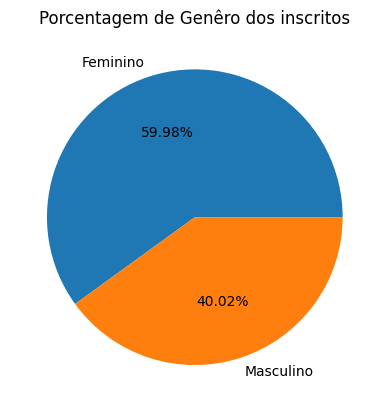

In [125]:
#distribuição do genêro dos inscritos
df_sexo.value_counts().plot(kind='pie', autopct='%.2f%%',ylabel = '',labels = df_sexo['Genêro '],title = 'Porcentagem de Genêro dos inscritos');
     

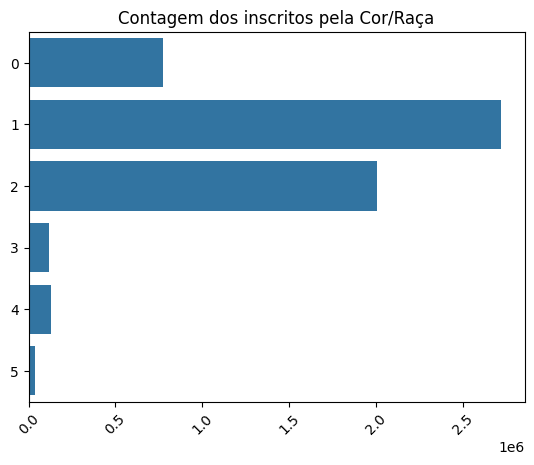

In [126]:
#distribuição dos inscritos pela cor/raça
sns.countplot(df_cor_raca['Cor/Raça'])
plt.xticks(rotation=45);
plt.ylabel("");
plt.xlabel('')
plt.title('Contagem dos inscritos pela Cor/Raça')
y = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y]);

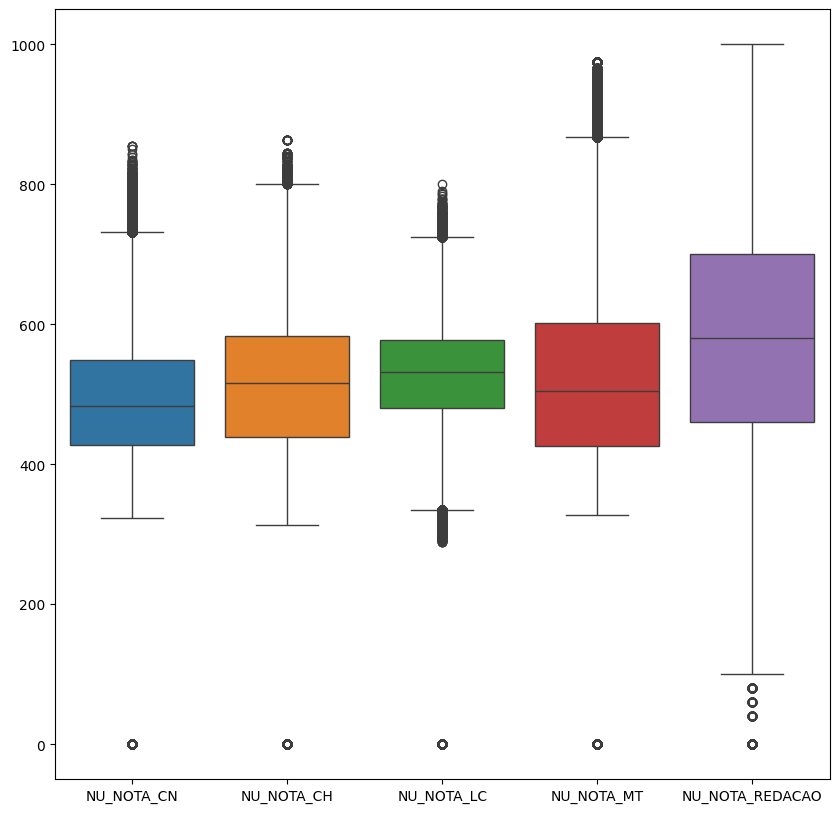

In [127]:
#boxplot das notas do enem
fig, ax = plt.subplots(figsize = (10, 10))
sns.boxplot(data = df_dados_notas, ax = ax);

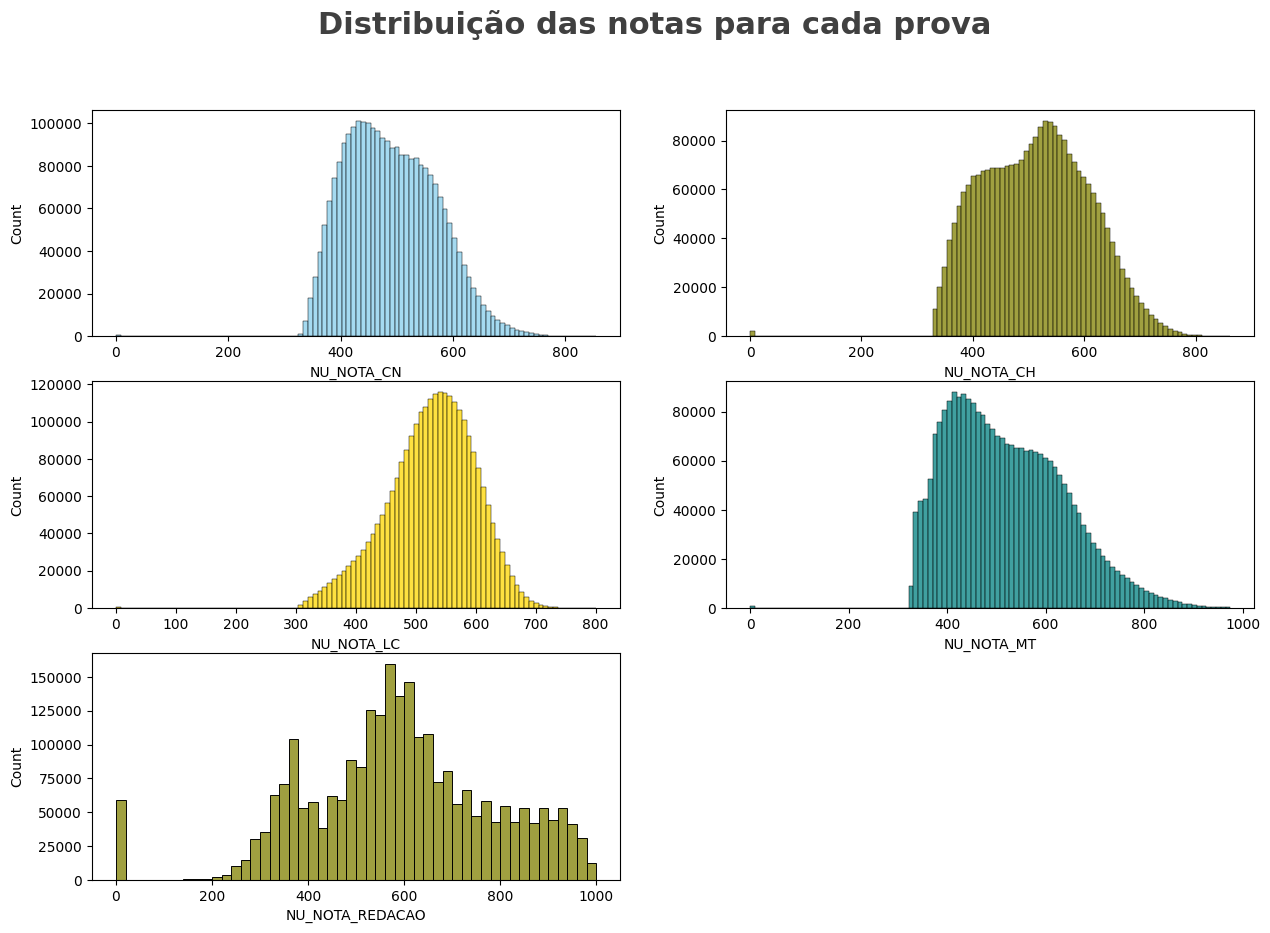

In [128]:
#Distribuicao das notas

# Criando o relátorio
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Plotando as notas em histogramas
sns.histplot(data=df_dados_notas, x='NU_NOTA_CN', color='skyblue', bins=100, ax=axs[0, 0])
sns.histplot(data=df_dados_notas, x='NU_NOTA_CH', color='olive', bins=100, ax=axs[0, 1])
sns.histplot(data=df_dados_notas, x='NU_NOTA_LC', color='gold', bins=100, ax=axs[1, 0])
sns.histplot(data=df_dados_notas, x='NU_NOTA_MT', color='teal', bins=100, ax=axs[1, 1])
sns.histplot(data=df_dados_notas, x='NU_NOTA_REDACAO', color='olive', bins=50, ax=axs[2, 0])
axs[2, 1].set_axis_off()

# Incluindo o Titulo na Figura
plt.suptitle('Distribuição das notas para cada prova', fontsize=22, color='#404040', fontweight=600);

In [129]:
df_dados_notas.describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
count,2.588681e+06,2.588681e+06,2.588681e+06,2.588681e+06,2.588681e+06
mean,4.905346e+02,5.142870e+02,5.260192e+02,5.207273e+02,5.813353e+02
std,7.984814e+01,9.496106e+01,7.304522e+01,1.171921e+02,1.960384e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.271000e+02,4.387000e+02,4.804000e+02,4.259000e+02,4.600000e+02
50%,4.838000e+02,5.157000e+02,5.318000e+02,5.053000e+02,5.800000e+02
75%,5.488000e+02,5.834000e+02,5.779000e+02,6.024000e+02,7.000000e+02
max,8.548000e+02,8.626000e+02,8.011000e+02,9.750000e+02,1.000000e+03


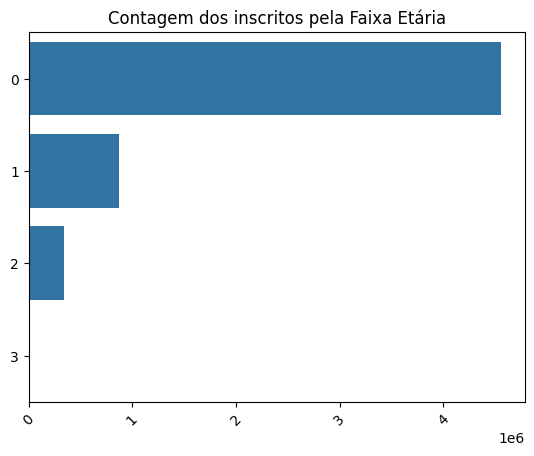

In [130]:
#distribuição dos inscritos pela faixa etária
sns.countplot(df_faixa_etaria['Faixa Etaria'])
plt.xticks(rotation=45);
plt.ylabel("");
plt.xlabel('')
plt.title('Contagem dos inscritos pela Faixa Etária')
y = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y]);

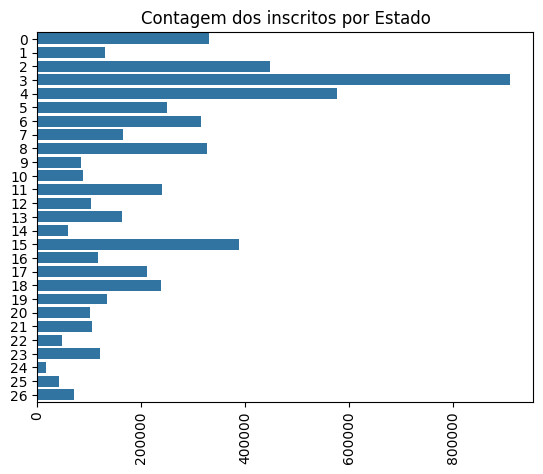

In [131]:
#distribuição dos inscritos peor estado
sns.countplot(df_dados_escola['SG_UF_ESC'])
plt.xticks(rotation=90);
plt.ylabel("");
plt.xlabel('')
plt.title('Contagem dos inscritos por Estado')
y = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in y]);